# Investigating Netflix Movies

### Project Instructions
Perform exploratory data analysys on the netflix_data.csv data to understand more about movies from the 1990s decade.
* What was the most frequent **movie** duration in the 1990s? Save an approximate answer as an integer called **duration**.
* A movie is considered short if it less than 90 minute. Count the number of **short action movies** released in the 1990s and save this integer as **short_movie_count**
  


Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset netflix_data.csv, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

**Vamos a importar los paquetes necesarios para realizar el proyecto**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importamos el dataframe**


In [40]:
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


Antes de manipular la data, verificó que tipo de datos tiene cada columna

In [41]:
print(netflix_df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object



## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

We are interested in movies released in the 1990s, so filtered out movies that came out after 1990. (release_year)

In [42]:
movies_1990s = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"] >=1990) & (netflix_df["release_year"] < 2000)]

In [43]:
movies_1990s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,"October 19, 2020",1999,106,Three intrepid teens roam the streets of Beiru...,Dramas
4689,s7571,Movie,What's Eating Gilbert Grape,Lasse Hallström,"Johnny Depp, Leonardo DiCaprio, Juliette Lewis...",United States,"January 1, 2021",1993,118,"In a backwater Iowa town, young Gilbert is tor...",Classic Movies
4718,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,"January 1, 2020",1999,106,"Armed with an ingenious arsenal, two top-notch...",Action
4746,s7682,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,191,Legendary lawman Wyatt Earp is continually at ...,Action


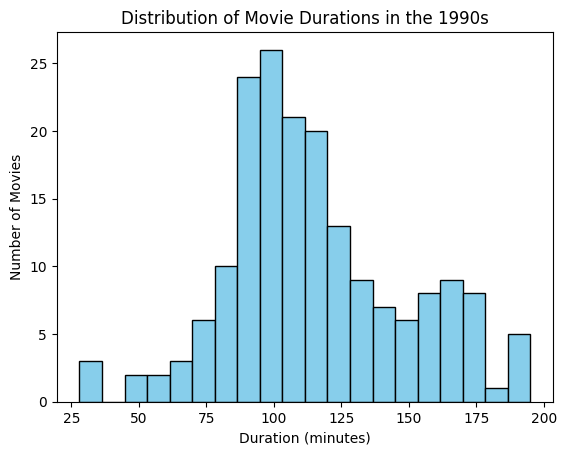

In [44]:
plt.hist(movies_1990s["duration"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

### The most frequent movie duration in the 90s was 100 minutes.

In [45]:
duration = 100

To count the number of short action movies, we firt have to filter the movies by the desired genre

In [47]:
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]
action_movies_1990s

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
352,s508,Movie,Andaz Apna Apna,Rajkumar Santoshi,"Aamir Khan, Salman Khan, Raveena Tandon, Karis...",India,"May 11, 2020",1994,160,Broke and with no concrete plans for the futur...,Action
431,s628,Movie,Austin Powers: The Spy Who Shagged Me,Jay Roach,"Mike Myers, Heather Graham, Michael York, Robe...",United States,"December 1, 2019",1999,95,When diabolical genius Dr. Evil travels back i...,Action
468,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,119,"In this fast-paced actioner, two Miami narcoti...",Action
515,s757,Movie,Barsaat,Rajkumar Santoshi,"Twinkle Khanna, Bobby Deol, Danny Denzongpa, R...",India,"April 1, 2018",1995,166,A naïve young man and a rich city girl fall in...,Action
675,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...",Germany,"January 1, 2021",1999,94,A jewel thief returns to his hiding place afte...,Action
815,s1236,Movie,Casino Tycoon,Wong Jing,Wong Jing,Hong Kong,"August 1, 2018",1992,125,"When Japanese troops invade Hong Kong, young B...",Action
816,s1237,Movie,Casino Tycoon 2,Wong Jing,Dennis Chan,Hong Kong,"August 16, 2018",1992,108,Casino mogul Benny Ho wields enormous power. B...,Action
1018,s1605,Movie,Dante's Peak,Roger Donaldson,"Pierce Brosnan, Linda Hamilton, Elizabeth Hoff...",United States,"September 1, 2019",1997,108,When a volcanologist comes to investigate the ...,Action
1179,s1850,Movie,Dragonheart,Rob Cohen,"Sean Connery, Dennis Quaid, David Thewlis, Pet...",United States,"January 1, 2020",1996,103,In ancient times when majestic fire-breathers ...,Action
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action


I created a counter to see the number of action movies that have a 
duration of less than 90 minutes

In [48]:
counter = 0
for label, row in action_movies_1990s.iterrows():
    if row["duration"] < 90:
        counter = counter + 1
    else:
        counter = counter
print(counter)

7


## The number of action movies released in the 90s, with a duration of less than 90 minutes is equal to 7

Whit this we finish what was initially asked of us, but we continue exploring the dataframe

Let's see what genres it covers

In [52]:
unique_genres = movies_1990s['genre'].unique()
print("Unique Genres", unique_genres)


Unique Genres ['Dramas' 'Comedies' 'Children' 'Action' 'Documentaries' 'Classic Movies'
 'Stand-Up' 'Cult Movies' 'Thrillers' 'Horror Movies']


In [64]:
genre_counts_by_year = movies_1990s.groupby(['release_year', 'genre']).size().unstack(fill_value=0)
genre_counts_by_year

genre,Action,Children,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Horror Movies,Stand-Up,Thrillers
release_year,,,,,,,,,,
1990,5,0,1,3,0,0,4,0,1,0
1991,1,3,2,1,0,0,4,0,3,0
1992,5,0,6,2,1,0,0,0,2,0
1993,3,2,3,1,0,0,5,0,1,1
1994,6,1,3,1,0,1,2,0,0,0
1995,6,3,0,3,0,0,4,0,0,0
1996,2,0,0,7,0,0,4,1,0,1
1997,9,1,0,7,0,0,6,2,0,1
1998,4,2,0,10,1,1,6,0,1,1


I create a graphic

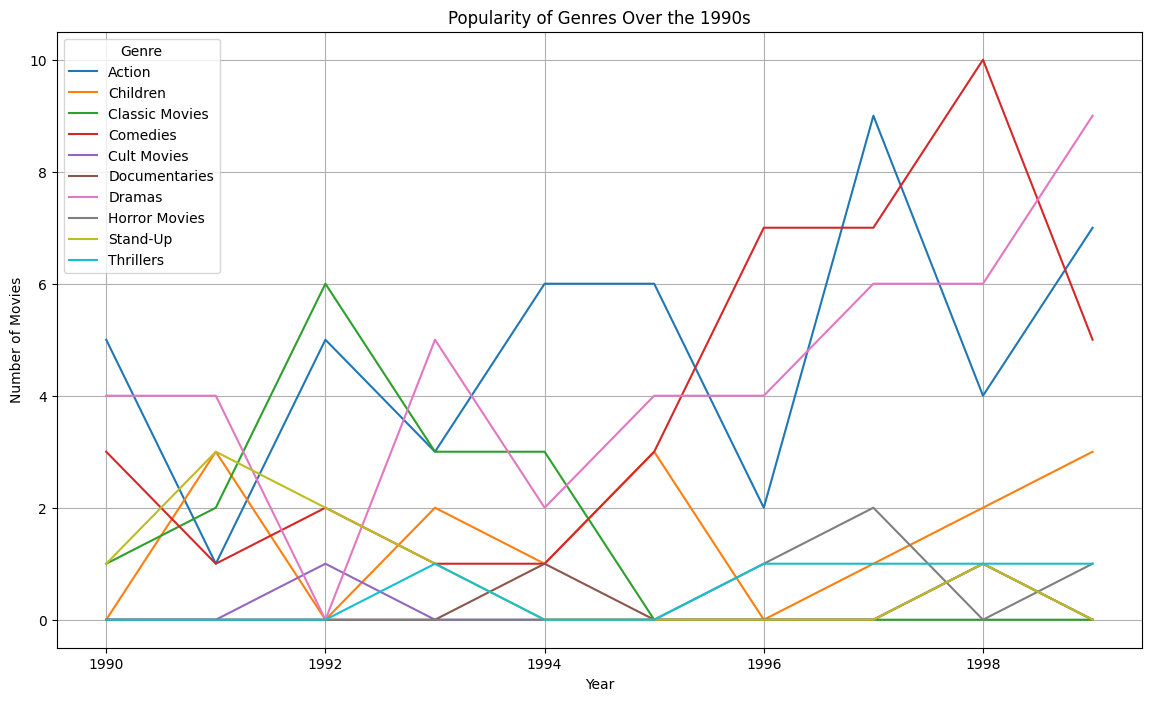

In [67]:
plt.figure(figsize=(14,8))
for genre in genre_counts_by_year.columns:
    if genre != 'Total':
        plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], label = genre)
#title and tags

plt.title("Popularity of Genres Over the 1990s")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend(title = 'Genre')
plt.grid(True)
plt.show()

In [69]:
genre_counts = movies_1990s['genre'].value_counts()
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Genre', 'Number of Movies']
genre_counts_df

,Genre,Number of Movies
0,Action,48
1,Dramas,44
2,Comedies,40
3,Children,15
4,Classic Movies,15
5,Stand-Up,8
6,Thrillers,5
7,Horror Movies,4
8,Documentaries,2
9,Cult Movies,2


Also we can see the average length of movies by genre

In [75]:
average_duration_genre_df = (
    movies_1990s.groupby('genre')['duration'].mean().reset_index(name='Average duration')
)
average_duration_genre_df

,genre,Average duration
0,Action,120.145833
1,Children,93.066667
2,Classic Movies,128.733333
3,Comedies,110.700000
4,Cult Movies,100.000000
5,Documentaries,72.000000
6,Dramas,132.045455
7,Horror Movies,104.750000
8,Stand-Up,53.250000
9,Thrillers,109.200000


Let's look graphically at the movie genres that on average have a longer duration.

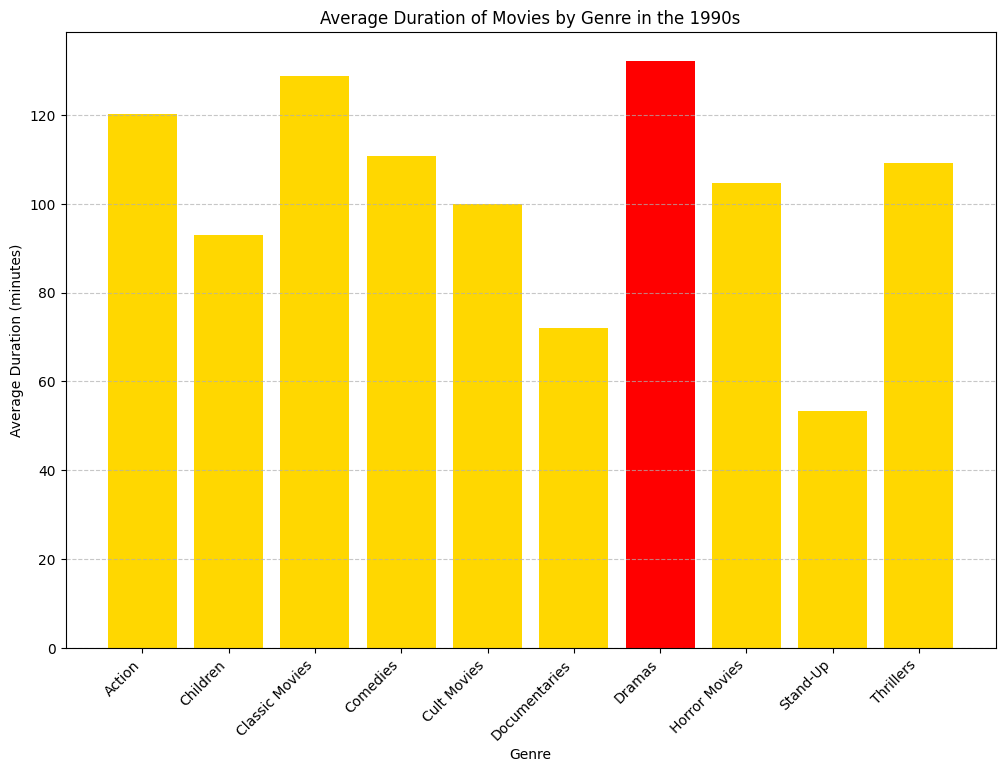

In [85]:
import matplotlib.pyplot as plt
#Get the maximum value
max_duration = average_duration_genre_df['Average duration'].max()
max_duration_genre = average_duration_genre_df[average_duration_genre_df['Average duration'] == max_duration]['genre'].values[0]

plt.figure(figsize=(12, 8))

# Set colors to highlight the maximum value
bar_colors = ['gold' if genre != max_duration_genre else 'red' for genre in average_duration_genre_df['genre']]

plt.bar(average_duration_genre_df['genre'], average_duration_genre_df['Average duration'], color=bar_colors)

plt.title('Average Duration of Movies by Genre in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Now let's analyze the number of films by director

In [101]:
# Count movies by director
directors_count_df = movies_1990s.groupby('director').size().to_frame(name='Movie Count').reset_index()

# Sort and select top 10
directors_count_df = directors_count_df.sort_values(by='Movie Count', ascending=False).head(10)

directors_count_df

,director,Movie Count
62,Johnnie To,4
134,Subhash Ghai,3
42,Gregory Hoblit,3
81,Mahesh Bhatt,3
113,Rajkumar Santoshi,3
141,Umesh Mehra,3
146,Youssef Chahine,3
127,Sooraj R. Barjatya,3
22,Chris Bould,2
84,Martin Campbell,2
